In [73]:
%pylab inline
from opt import trainAndEvaluatePrimalModel
import sklearn.metrics as metrics
import kernels

# uncomment in python3
# from importlib import reload
import theano.sandbox.cuda as cuda

import kernels
reload(kernels)
from kernels import *
from utils import *
import theano


from theano import function, config, shared, sandbox
import theano.misc.pycuda_init
import theano.tensor as T
from theano import gpuarray
from theano.tensor.nnet import conv2d
from theano.tensor.signal.pool import pool_2d

Populating the interactive namespace from numpy and matplotlib


In [74]:
DATAPATH = '/data/vaishaal/endive-exp/EGR1_withNegatives/'

In [75]:
XSeqTrain, labelsTrain = loadSeqFromText(DATAPATH + "EGR1_GM12878_Egr-1_HudsonAlpha_AC.seq", delim=' ')
XSeqTest, labelsTest = loadSeqFromText(DATAPATH + "EGR1_GM12878_Egr-1_HudsonAlpha_B.seq", delim='\t')

In [76]:
XTrain = convertSeqToMatrix(XSeqTrain)
XTest = convertSeqToMatrix(XSeqTest)

In [77]:
D = 8192
gamma = 100
W = np.random.randn(D,8*4) * gamma
b = np.zeros

In [70]:
%time XLiftTrain_cpu = generateConvFeatures(XTrain[:10], W, offset=b, gpu=False)
%time XLiftTest_cpu = generateConvFeatures(XTest[:10], W, offset=b, gpu=False)

(0, 'Images Convolved')
CPU times: user 10.8 s, sys: 360 ms, total: 11.2 s
Wall time: 674 ms
(0, 'Images Convolved')
CPU times: user 9.82 s, sys: 320 ms, total: 10.1 s
Wall time: 422 ms


In [71]:
conv_kernel_approx = XLiftTrain_cpu.T.dot(XLiftTrain_cpu)

In [72]:
conv_kernel_approx

array([[ 0.07108632, -0.01068532, -0.01330626, ...,  0.00466472,
         0.02181059,  0.03752138],
       [-0.01068532,  0.11583213,  0.04334515, ...,  0.02590342,
         0.01710021, -0.0055558 ],
       [-0.01330626,  0.04334515,  0.21665961, ...,  0.01186051,
         0.04383238, -0.0054791 ],
       ..., 
       [ 0.00466472,  0.02590342,  0.01186051, ...,  0.15610135,
         0.03357243, -0.0873561 ],
       [ 0.02181059,  0.01710021,  0.04383238, ...,  0.03357243,
         0.07334742,  0.02663375],
       [ 0.03752138, -0.0055558 , -0.0054791 , ..., -0.0873561 ,
         0.02663375,  0.13843524]])

In [78]:
%time XLiftTest_gpu = generateConvFeatures(XTest, W, batch_size=1024, feature_batch_size=2048, gpu=True)
%time XLiftTrain_gpu = generateConvFeatures(XTrain, W, batch_size=1024, feature_batch_size=2048, gpu=True)


0
('Feature Batch ', 0)
('Data Batch ', 0)
('Feature Batch ', 1)
('Data Batch ', 0)
('Feature Batch ', 2)
('Data Batch ', 0)
('Feature Batch ', 3)
('Data Batch ', 0)
CPU times: user 6.49 s, sys: 1.76 s, total: 8.25 s
Wall time: 8.3 s
0
('Feature Batch ', 0)
('Data Batch ', 0)
('Data Batch ', 1)
('Data Batch ', 2)
('Data Batch ', 3)
('Data Batch ', 4)
('Data Batch ', 5)
('Data Batch ', 6)
('Data Batch ', 7)
('Data Batch ', 8)
('Data Batch ', 9)
('Data Batch ', 10)
('Data Batch ', 11)
('Data Batch ', 12)
('Data Batch ', 13)
('Data Batch ', 14)
('Data Batch ', 15)
('Data Batch ', 16)
('Data Batch ', 17)
('Data Batch ', 18)
('Data Batch ', 19)
('Data Batch ', 20)
('Data Batch ', 21)
('Data Batch ', 22)
('Data Batch ', 23)
('Data Batch ', 24)
('Data Batch ', 25)
('Data Batch ', 26)
('Data Batch ', 27)
('Data Batch ', 28)
('Data Batch ', 29)
('Data Batch ', 30)
('Feature Batch ', 1)
('Data Batch ', 0)
('Data Batch ', 1)
('Data Batch ', 2)
('Data Batch ', 3)
('Data Batch ', 4)
('Data Batch ',

In [35]:
XLiftTrain_gpu.shape

(16486, 2048)

In [36]:
XLiftTest_gpu

array([[  0.21526679,   2.06523132,  19.83791542, ...,   5.89636612,
          5.78100681,  -4.88853502],
       [  1.37520897,  -0.8077206 ,  26.86598778, ...,   4.85433102,
         -1.20517111,  -0.82566029],
       [  0.2073974 ,  -6.727005  ,  20.34199905, ...,  -6.16841125,
         -3.74547648,   4.23827219],
       ..., 
       [ -4.06682014,  -4.96436262,  22.12273788, ...,  -7.91680765,
          4.89002466,  -5.83514929],
       [ -3.22388315,  -1.36402559,  16.41782188, ...,   0.25410309,
          3.26530957,  14.46560478],
       [  7.18901777,  -8.23131847,  17.80782318, ...,  -7.04175186,
          6.65466595, -11.4241457 ]])

('X SHAPE ', (16486, 404))
Computing XTX
Done Computing XTX
('Train acc', 0.5670872255246876)
('Test acc', 0.61161161161161159)
('Train ROC ', 0.59796881686502679)
('Test ROC ', 0.65546292585170329)


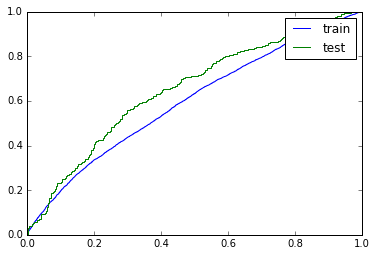

In [42]:
train_roc, test_roc = trainAndEvaluatePrimalModel(XTrain, XTest, labelsTrain, labelsTest)
train = plt.plot(train_roc[0], train_roc[1], label="train")
test = plt.plot(test_roc[0], test_roc[1], label="test")
print("Train ROC ", metrics.auc(train_roc[0], train_roc[1]))
print("Test ROC ", metrics.auc(test_roc[0], test_roc[1]))
plt.legend(handles=[train[0], test[0]])

X SHAPE  (16486, 1)
Computing XTX
Done Computing XTX
Train acc 0.499878684945
Test acc 0.503503503504
Train ROC  0.524051692076
Test ROC  0.555350701403


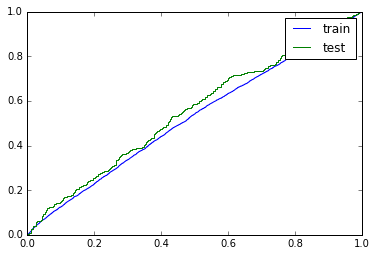

In [107]:
train_roc, test_roc = trainAndEvaluatePrimalModel(XLiftTrain_cpu, XLiftTest_cpu,labelsTrain,labelsTest)
train = plt.plot(train_roc[0], train_roc[1], label="train")
test = plt.plot(test_roc[0], test_roc[1], label="test")
print ("Train ROC ", metrics.auc(train_roc[0], train_roc[1]))
print ("Test ROC ", metrics.auc(test_roc[0], test_roc[1]))
plt.legend(handles=[train[0], test[0]])

('X SHAPE ', (16486, 8192))
Computing XTX
Done Computing XTX
('Train acc', 0.94461967730195318)
('Test acc', 0.76676676676676681)
('Train ROC ', 0.98660677669754282)
('Test ROC ', 0.84589979959919837)


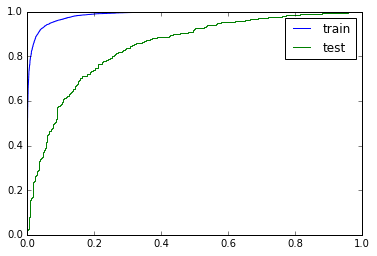

In [52]:
train_roc, test_roc = trainAndEvaluatePrimalModel(XLiftTrain_gpu, XLiftTest_gpu,labelsTrain,labelsTest, reg=0)
train = plt.plot(train_roc[0], train_roc[1], label="train")
test = plt.plot(test_roc[0], test_roc[1], label="test")
print ("Train ROC ", metrics.auc(train_roc[0], train_roc[1]))
print ("Test ROC ", metrics.auc(test_roc[0], test_roc[1]))
plt.legend(handles=[train[0], test[0]])

('X SHAPE ', (16486, 1024))
Computing XTX
Done Computing XTX
('Train acc', 0.78709207812689552)
('Test acc', 0.78678678678678682)
('Train ROC ', 0.87070864549246285)
('Test ROC ', 0.8784168336673347)


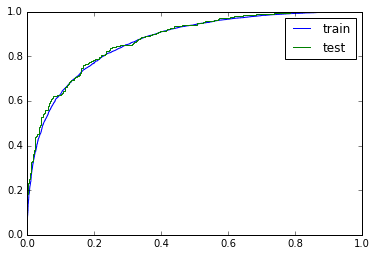

In [38]:
train_roc, test_roc = trainAndEvaluatePrimalModel(XLiftTrain_cpu, XLiftTest_cpu,labelsTrain,labelsTest, reg=0)
train = plt.plot(train_roc[0], train_roc[1], label="train")
test = plt.plot(test_roc[0], test_roc[1], label="test")
print ("Train ROC ", metrics.auc(train_roc[0], train_roc[1]))
print ("Test ROC ", metrics.auc(test_roc[0], test_roc[1]))
plt.legend(handles=[train[0], test[0]])

In [113]:
cuda

<module 'theano.sandbox.cuda' from '/data/vaishaal/anaconda3/lib/python3.5/site-packages/theano/sandbox/cuda/__init__.py'>

In [21]:
XLiftTest_gpu

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])